In [39]:
#import all libraries necessary for the project work
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [40]:
#Share specific information
SO = 100
vO = 0.06
kappa = 9
theta = 0.06
r = 0.08
sigma = 0.3
rho = -0.4

#call Option specific information
T = 1
K = 100
k_log = np.log(K)

#Approximation information
t_max = 30
N = 100


In [41]:
#characteristic function code
a= sigma**2/2

def b(u):
    return kappa - rho*sigma*1j*u

def c(u):
    return -(u**2+1j*u)/2

def d(u):
    return np.sqrt(b(u)**2-4*a*c(u))

def xminus(u):
    return (b(u)-d(u))/(2*a)

def xplus(u):
    return (b(u)+d(u))/(2*a)

def g(u):
    return xminus(u)/xplus(u)

def C(u):
    val1 = T*xminus(u)-np.log((1-g(u)*np.exp(-T*d(u)))/(1-g(u)))
    return r*T*1j*u+theta*kappa*val1

def D(u):
    val1=1-np.exp(-T*d(u))
    val2=1-g(u)*np.exp(-T*d(u))
    return (val1/val2)*xminus(u)

def log_char(u):
    return np.exp(C(u)+D(u)*vO+1j*u*np.log(SO))

def adj_char(u):
    return log_char(u-1j)/log_char(-1j)



In [42]:
#Vectorizing our code
delta_t=t_max/N
from_1_to_N=np.linspace(1,N,N)
t_n=(from_1_to_N-1/2)*delta_t

In [43]:
#Estimating Integrals
first_integral=sum((((np.exp(-1j*t_n*k_log)*adj_char(t_n)).imag)/t_n)*delta_t)
second_integral=sum((((np.exp(-1j*t_n*k_log)*log_char(t_n)).imag)/t_n)*delta_t)


In [44]:
#Fourier call price estimate
fourier_cal_val = SO*(1/2+first_integral/np.pi)-np.exp(-r*T)*K*(1/2+second_integral/np.pi)
print('Price estimate =', fourier_cal_val)

Price estimate = 14.189810714073971


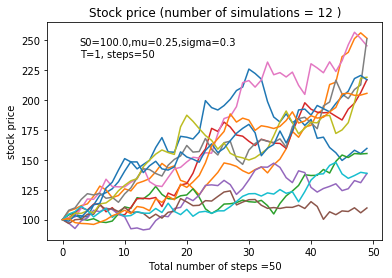

In [47]:
# SECTION 2
# Simulating path for the underlying share
import scipy as sp

mu =0.25
n_steps = 50
sp.random.seed(12345)
n_simulation = 12 
dt =T/n_steps
#
S = sp.zeros([n_steps], dtype=float) 
x = range(0, int(n_steps), 1) 
for j in range(0, n_simulation): 
    S[0]= SO
    for i in x[:-1]: 
        e=sp.random.normal() 
        S[i+1]=S[i]+S[i]*(lamda-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; 
    plt.plot(x, S)
#
plt.figtext(0.2,0.8,'S0='+str(S[0])+',mu='+str(mu)+',sigma='+str(sigma)) 
plt.figtext(0.2,0.76,'T='+str(T)+', steps='+str(int(n_steps))) 
plt.title('Stock price (number of simulations = %d ' % n_simulation +')') 
plt.xlabel('Total number of steps ='+str(int(n_steps))) 
plt.ylabel('stock price') 
plt.show()